# Adding New Columns

In the second chapter we will learn how to add new columns to the tables based on a set of functions. This is similar to the Functions that are available in Excel with _=FUNC(A1)_

We will start with loading a csv file that is hosted in data.world on the "Median Value Per Sq ft per zip code in the US"

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('https://query.data.world/s/xrfy7fb7oq55gpzh6bvs6jtonv32lk')

In [8]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1306.0,1290,1277,1272,1271,1277,1281,1279,1274,1270
1,84654,60657,Chicago,IL,Chicago,Cook,2,134.0,134.0,133.0,...,291.0,294,296,295,293,294,294,294,294,295
2,61637,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,...,1602.0,1597,1580,1567,1569,1570,1560,1543,1529,1521
3,84616,60614,Chicago,IL,Chicago,Cook,4,149.0,150.0,150.0,...,330.0,333,333,331,330,330,329,328,329,329
4,93144,79936,El Paso,TX,El Paso,El Paso,5,50.0,51.0,50.0,...,81.0,81,81,81,81,81,82,82,82,82


## Constant Value

The simplest way to add a column is to put a constant value. Since we know that this data is only for USA we can add a column with the value _USA_ to a new column called _country_. We will be able to later merge this table with data from other countries and then this new column will be useful. 

For setting a value in a column we will use the [assign](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.assign.html) function of Pandas. You will need to scroll all the way to the right of the output to see the new _country_ column.

In [9]:
(
    df
    .assign(country="USA")
)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,country
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1290,1277,1272,1271,1277,1281,1279,1274,1270,USA
1,84654,60657,Chicago,IL,Chicago,Cook,2,134.0,134.0,133.0,...,294,296,295,293,294,294,294,294,295,USA
2,61637,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,...,1597,1580,1567,1569,1570,1560,1543,1529,1521,USA
3,84616,60614,Chicago,IL,Chicago,Cook,4,149.0,150.0,150.0,...,333,333,331,330,330,329,328,329,329,USA
4,93144,79936,El Paso,TX,El Paso,El Paso,5,50.0,51.0,50.0,...,81,81,81,81,81,82,82,82,82,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14750,73940,36564,Fairhope,AL,Daphne,Baldwin,14751,NaN,NaN,NaN,...,230,238,243,245,244,245,246,244,240,USA
14751,59107,3293,Woodstock,NH,Claremont,Grafton,14752,58.0,59.0,61.0,...,129,129,128,129,130,130,130,130,131,USA
14752,82396,55713,Buhl,MN,Duluth,Saint Louis,14753,NaN,NaN,NaN,...,72,73,74,74,73,73,74,77,79,USA
14753,66881,21405,Annapolis,MD,Baltimore,Anne Arundel,14754,146.0,149.0,151.0,...,470,462,457,457,455,454,455,458,460,USA


## Function Equivalent

Most of the functions that you are used to use in Excel have a direct Equivalent in Pands.

For example: ```=TRIM('cell for trimming')``` can be replaced by _strip_:

In [11]:
(
    df
    .assign(trimmed = df.City.str.strip())
    .head()
)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,trimmed
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1290,1277,1272,1271,1277,1281,1279,1274,1270,New York
1,84654,60657,Chicago,IL,Chicago,Cook,2,134.0,134.0,133.0,...,294,296,295,293,294,294,294,294,295,Chicago
2,61637,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,...,1597,1580,1567,1569,1570,1560,1543,1529,1521,New York
3,84616,60614,Chicago,IL,Chicago,Cook,4,149.0,150.0,150.0,...,333,333,331,330,330,329,328,329,329,Chicago
4,93144,79936,El Paso,TX,El Paso,El Paso,5,50.0,51.0,50.0,...,81,81,81,81,81,82,82,82,82,El Paso


or to remove spaces between words, you will need to run 'Find and Replace' option in Excel and in Pandas we can use the _replace_ function (note the last column that was added to the Dataframe):

In [13]:
(
    df
    .assign(no_space = df.City.str.replace(' ',''))
    .head()
)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,no_space
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1290,1277,1272,1271,1277,1281,1279,1274,1270,NewYork
1,84654,60657,Chicago,IL,Chicago,Cook,2,134.0,134.0,133.0,...,294,296,295,293,294,294,294,294,295,Chicago
2,61637,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,...,1597,1580,1567,1569,1570,1560,1543,1529,1521,NewYork
3,84616,60614,Chicago,IL,Chicago,Cook,4,149.0,150.0,150.0,...,333,333,331,330,330,329,328,329,329,Chicago
4,93144,79936,El Paso,TX,El Paso,El Paso,5,50.0,51.0,50.0,...,81,81,81,81,81,82,82,82,82,ElPaso


### More Textual Functions

Another commonly used Excel functions are LEFT and RIGHT (```=LEFT(Cell, number of digits)```). In Pandas, we can use the '```:```', which is used for _until_ or _from_:

In [15]:
(
    df
    .assign(left_city = df.City.str[:5]) # until the 5th character
    .assign(right_city = df.City.str[-5:]) # from the 5th characters from the end (=right)
    .head()
)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,left_city,right_city
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1277,1272,1271,1277,1281,1279,1274,1270,New Y,York
1,84654,60657,Chicago,IL,Chicago,Cook,2,134.0,134.0,133.0,...,296,295,293,294,294,294,294,295,Chica,icago
2,61637,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,...,1580,1567,1569,1570,1560,1543,1529,1521,New Y,York
3,84616,60614,Chicago,IL,Chicago,Cook,4,149.0,150.0,150.0,...,333,331,330,330,329,328,329,329,Chica,icago
4,93144,79936,El Paso,TX,El Paso,El Paso,5,50.0,51.0,50.0,...,81,81,81,81,82,82,82,82,El Pa,Paso


## Using Lambda

Lambda is a bit confusing at first glance, however, it is used to define a the function that we want to apply on a each row or columns of the table. For example, let's define two new columns: one that is calculating the quantile of the region compare to all the regions, and one that is checking if the state is one of ['NY','NJ']

If you scroll all the way to the right on the table below, you can see the new two columns at the end.

In [20]:
(
    df
    .assign(last_quantile=lambda x : x['2017-09']/max(x['2017-09']))    
    .assign(is_NY_or_NJ=lambda x : x.State.isin(['NY','NJ']))
)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,last_quantile,is_NY_or_NJ
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1277,1272,1271,1277,1281,1279,1274,1270,0.702434,True
1,84654,60657,Chicago,IL,Chicago,Cook,2,134.0,134.0,133.0,...,296,295,293,294,294,294,294,295,0.163164,False
2,61637,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,...,1580,1567,1569,1570,1560,1543,1529,1521,0.841261,True
3,84616,60614,Chicago,IL,Chicago,Cook,4,149.0,150.0,150.0,...,333,331,330,330,329,328,329,329,0.181969,False
4,93144,79936,El Paso,TX,El Paso,El Paso,5,50.0,51.0,50.0,...,81,81,81,81,82,82,82,82,0.045354,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14750,73940,36564,Fairhope,AL,Daphne,Baldwin,14751,NaN,NaN,NaN,...,238,243,245,244,245,246,244,240,0.132743,False
14751,59107,3293,Woodstock,NH,Claremont,Grafton,14752,58.0,59.0,61.0,...,129,128,129,130,130,130,130,131,0.072456,False
14752,82396,55713,Buhl,MN,Duluth,Saint Louis,14753,NaN,NaN,NaN,...,73,74,74,73,73,74,77,79,0.043695,False
14753,66881,21405,Annapolis,MD,Baltimore,Anne Arundel,14754,146.0,149.0,151.0,...,462,457,457,455,454,455,458,460,0.254425,False


## Multiple Data Sources

We can do a more complicated analysis that is based on additional external sources. For example, we want to calculate the differences between red states and blue states. We can then ask various questions regarding the impacts or correlation between the house prices and the election results and voting patterns. 

First we will load data regarding the voting in various states across the years. A quick internet search finds an interesting table in the following Wikipedia page. Since there are multiple tables on that page, we can filter them using the _match_ option, and using the word _Year_ as the filter.

In [21]:
red_blue_states_wikipedia_entry = 'https://en.wikipedia.org/wiki/Red_states_and_blue_states'
wikipedia_page_tables = pd.read_html(red_blue_states_wikipedia_entry, match='Year')

As we saw in the loading data from web site, the list can includes multiple tables. However, we filtered it and only have one table, and we can access it with the _[0]_ modifier.

In [22]:
red_blue_states = wikipedia_page_tables[0]
red_blue_states.head()

,Year,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016
0,Democratic candidate,George McGovern,Jimmy Carter,Jimmy Carter,Walter Mondale,Michael Dukakis,Bill Clinton,Bill Clinton,Al Gore,John Kerry,Barack Obama,Barack Obama,Hillary Clinton
1,Republican candidate,Richard Nixon,Gerald Ford,Ronald Reagan,Ronald Reagan,George H. W. Bush,George H. W. Bush,Bob Dole,George W. Bush,George W. Bush,John McCain,Mitt Romney,Donald Trump
2,National popular vote,Nixon,Carter,Reagan,Reagan,Bush,B. Clinton,Clinton,Gore,Bush,Obama,Obama,H. Clinton
3,Alabama,Nixon,Carter,Reagan,Reagan,Bush,Bush,Dole,Bush,Bush,McCain,Romney,Trump
4,Alaska,Nixon,Ford,Reagan,Reagan,Bush,Bush,Dole,Bush,Bush,McCain,Romney,Trump


We will start with creating a new list of states that voted for a specific candidate in a specific electio. First, let's use Trump in the 2016 elections. 

We are using here a few new functions such as [rename](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html), [query](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) and [iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html), which we will discuss in more details in the next sections.

In [23]:
red_candidate = 'Trump'
election_year = '2016'

In [24]:
red_states = (
    red_blue_states
    .rename(columns={election_year:'election_year'})
    .reset_index()
    .query("election_year == @red_candidate")
    .iloc[:,1]
)
red_states

3            Alabama
4             Alaska
5            Arizona
6           Arkansas
12           Florida
13           Georgia
15             Idaho
17           Indiana
18              Iowa
19            Kansas
20          Kentucky
21         Louisiana
27          Michigan
29       Mississippi
30          Missouri
31           Montana
39    North Carolina
40      North Dakota
41              Ohio
42          Oklahoma
44      Pennsylvania
46    South Carolina
47      South Dakota
48         Tennessee
49             Texas
50              Utah
54     West Virginia
55         Wisconsin
56           Wyoming
Name: Year, dtype: object

Now that we have the list of the red states, we need to match them to the states that we have in our house prices data set. We see that we have to match the short version in the data set with the long version in the red state list. 

We will use a another option to create a data frame using a Dictionary. It is not hard to find a list of mapping of states names and abbreviations. 

In [25]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

and we can use the dictionary to create a table (DataFrame) from it

In [26]:
us_state_abbrev_df = (
    pd
    .DataFrame
    .from_dict(us_state_abbrev, 
                orient='index',
                columns=['Abbreviation'])
)

Next, we will filter the table to include only the red states that we calculated before

In [27]:
red_state_abbrev = (
    us_state_abbrev_df
    .loc[red_states]
    .loc[:,'Abbreviation']
)
red_state_abbrev

Alabama           AL
Alaska            AK
Arizona           AZ
Arkansas          AR
Florida           FL
Georgia           GA
Idaho             ID
Indiana           IN
Iowa              IA
Kansas            KS
Kentucky          KY
Louisiana         LA
Michigan          MI
Mississippi       MS
Missouri          MO
Montana           MT
North Carolina    NC
North Dakota      ND
Ohio              OH
Oklahoma          OK
Pennsylvania      PA
South Carolina    SC
South Dakota      SD
Tennessee         TN
Texas             TX
Utah              UT
West Virginia     WV
Wisconsin         WI
Wyoming           WY
Name: Abbreviation, dtype: object

Finally, we can create a new column in our dataset (_is_red_) by checking if the _State_ in the row is in the list of red states that we calculated above. 

We can then, immediately use the new column to calculate the average (_mean_) price in _2017_09_ of the two groups, and see that the average in the blue states (_is_red = False_) is more than twice the average of red states (_is_red = True_)

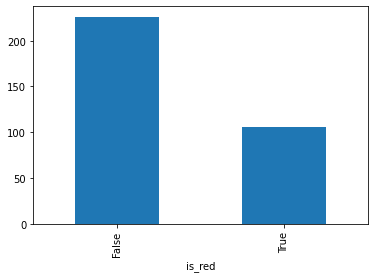

In [30]:
(
    df
    .assign(is_red=lambda x : x.State.isin(red_state_abbrev))
    .groupby('is_red')['2017-09']
    .mean()
    .plot
    .bar()
);